In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector

!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/nbPmKbcsJvZrjjx/291694/AnalysisResults.root' > run291694.mc.root

!file *.root
file = uproot.open("run291694.mc.root")

events = file["eventsTree"]
gen = file["genTree"]

events.show()
gen.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6915k  100 6915k    0     0   972k      0  0:00:07  0:00:07 --:--:-- 1892k
run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.data.root: ROOT file Version 61600 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
xVtx                 | double                   | AsDtype('>f8')
yVtx                 | double                   | AsDtype('>f8')
zVtx                 | double                   | AsDtype('>f8')
isCINT               | bool                     | AsDtype('bool')
isCMSL               | bool                     | AsDtype('bool')
isCMSH               | 

In [ ]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector

def mag(px,py,pz):
    """Returns the norm of the 3-vector (px,py,pz)."""
    return np.sqrt(px*px+py*py+pz*pz)

def invMass(p, E):
    """Returns the invariant mass of the event"""
    return np.sqrt(E*E - p*p)

!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/JIjQaAYEQnmRDkX/291694/AnalysisResults.root' > run291694.data.root

!file *.root
file = uproot.open("run291694.data.root")

events = file["eventsTree"]

c = 299792458.

charge = np.array([], dtype=int)

totalEnergy = np.array([], dtype=float)
totalMomentum_norm = np.array([], dtype=float)

invariantMass = np.array([],dtype=float)

for m in events.iterate(["nMuons","Muon_Px","Muon_Py","Muon_Pz", "Muon_E", "Muon_Charge"],step_size=100000):
    atLeastTwoMuons = (m.nMuons == 2) & (np.prod(m.Muon_Charge) == -1)
    t = m[atLeastTwoMuons]
    totalMomentum_norm = mag(t["Muon_Px"], t["Muon_Py"], t["Muon_Pz"])
    print(t["Muon_E"].shape, "\n")
    invariantMass = invMass(totalMomentum_norm, t["Muon_E"])

fig = plt.figure(figsize=(5,3))
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.set_title("Invariant mass distribution of muon tracks (data)")
axes.set_xlabel("Invariant mass ($GeV/c^2$)")
axes.set_ylabel("# of tracks")
axes.set_yscale("log")
axes.hist(invariantMass,bins=100,label="$Events$",histtype='step');
axes.legend();

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  100M  100  100M    0     0  4220k      0  0:00:24  0:00:24 --:--:-- 5571k
run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.data.root: ROOT file Version 61600 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)


AttributeError: no field named 'shape'

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.2/src/awkward/highlevel.py#L1124)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6915k  100 6915k    0     0   654k      0  0:00:10  0:00:10 --:--:-- 1202k
run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.data.root: ROOT file Version 61600 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)


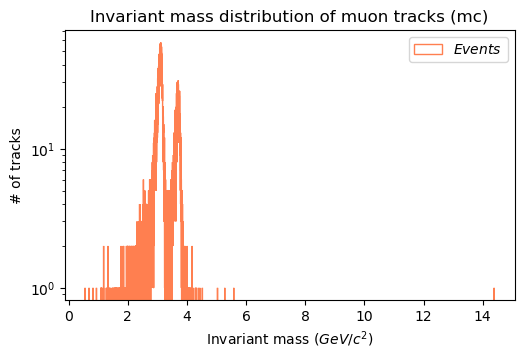

In [ ]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector

def mag(px:float,py:float,pz:float):
    """Returns the norm of the 3-vector (px,py,pz)."""
    return math.sqrt(px*px+py*py+pz*pz)

def invMass(p:float, E:float):
    """Returns the invariant mass of the event"""
    return math.sqrt(E*E - p*p)

!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/nbPmKbcsJvZrjjx/291694/AnalysisResults.root' > run291694.mc.root

!file *.root
file = uproot.open("run291694.mc.root")

events = file["eventsTree"]

c = 299792458.

m = events.arrays(["nMuons","Muon_Px","Muon_Py","Muon_Pz", "Muon_E", "Muon_Charge"],how="zip",entry_stop=1000000)
charge = np.array([0,0])
totalMomentum = np.array([0., 0., 0])
totalMomentum_norm = 0.
energy = np.array([0.,0.])
totalEnergy = 0.

invariantMass = np.array([],dtype=float)

for event in m[m.nMuons==2]:
    tracks = event["Muon"].to_list()
    i = 0
    momentum_x = np.array([], dtype=float)
    momentum_y = np.array([], dtype=float)
    momentum_z = np.array([], dtype=float)
    energy = np.array([], dtype=float)
    for t in tracks:
        energy = np.append(energy, t["E"])
        momentum_x = np.append(momentum_x, t["Px"])
        momentum_y = np.append(momentum_y, t["Py"])
        momentum_z = np.append(momentum_z, t["Pz"])
        if (t["Charge"] == 1):
            charge[i] = 1
        elif (t["Charge"] == -1):
            charge[i] = -1
        i += 1
    if charge[0] != charge[1]:
        totalMomentum[0] = np.sum(momentum_x)
        totalMomentum[1] = np.sum(momentum_y)
        totalMomentum[2] = np.sum(momentum_z)
        totalMomentum_norm = mag(totalMomentum[0], totalMomentum[1], totalMomentum[2])
        totalEnergy = np.sum(energy)
        invariantMass = np.append(invariantMass, invMass(totalMomentum_norm, totalEnergy))
            
fig = plt.figure(figsize=(5,3))
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.set_title("Invariant mass distribution of muon tracks (mc)")
axes.set_xlabel("Invariant mass ($GeV/c^2$)")
axes.set_ylabel("# of tracks")
axes.set_yscale("log")
axes.hist(invariantMass,bins=10000,label="$Events$",color='coral',histtype='step');
axes.legend();

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6915k  100 6915k    0     0   832k      0  0:00:08  0:00:08 --:--:-- 1495k
run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.data.root: ROOT file Version 61600 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)


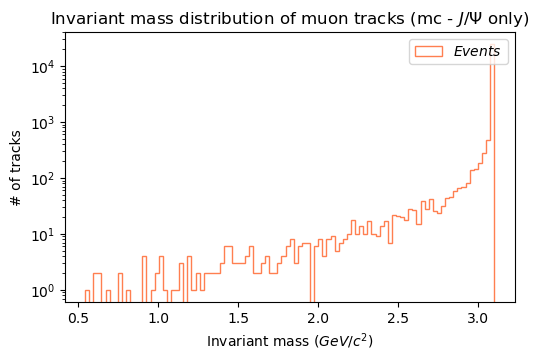

In [5]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector

def mag(px:float,py:float,pz:float):
    """Returns the norm of the 3-vector (px,py,pz)."""
    return math.sqrt(px*px+py*py+pz*pz)

def invMass(p:float, E:float):
    """Returns the invariant mass of the event"""
    return math.sqrt(E*E - p*p)

!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/nbPmKbcsJvZrjjx/291694/AnalysisResults.root' > run291694.mc.root

!file *.root
file = uproot.open("run291694.mc.root")

events = file["eventsTree"]
gen = file["genTree"]

c = 299792458.

m = events.arrays(["nMuons","Muon_Px","Muon_Py","Muon_Pz", "Muon_E", "Muon_Charge"],how="zip",entry_stop=1000000)
g = gen.arrays(["nMuonsGen", "Muon_GenE", "Muon_GenPx", "Muon_GenPy", "Muon_GenPz", "Muon_GenMotherPDGCode"], how="zip", entry_stop=1000000)
charge = np.array([0,0])
totalMomentum = np.array([0., 0., 0])
totalMomentum_norm = 0.
energy = np.array([0.,0.])
totalEnergy = 0.

invariantMass = np.array([],dtype=float)

for event in g[g.nMuonsGen==2]:
    tracks = event["Muon"].to_list()
    momentum_x = np.array([], dtype=float)
    momentum_y = np.array([], dtype=float)
    momentum_z = np.array([], dtype=float)
    energy = np.array([], dtype=float)
    for t in tracks:
        energy = np.append(energy, t["GenE"])
        momentum_x = np.append(momentum_x, t["GenPx"])
        momentum_y = np.append(momentum_y, t["GenPy"])
        momentum_z = np.append(momentum_z, t["GenPz"])
    if (t["GenMotherPDGCode"] == 443):
        totalMomentum[0] = np.sum(momentum_x)
        totalMomentum[1] = np.sum(momentum_y)
        totalMomentum[2] = np.sum(momentum_z)
        totalMomentum_norm = mag(totalMomentum[0], totalMomentum[1], totalMomentum[2])
        totalEnergy = np.sum(energy)
        invariantMass = np.append(invariantMass, invMass(totalMomentum_norm, totalEnergy))
            
fig = plt.figure(figsize=(5,3))
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.set_title("Invariant mass distribution of muon tracks (mc - $J/\Psi$ only)")
axes.set_xlabel("Invariant mass ($GeV/c^2$)")
axes.set_ylabel("# of tracks")
axes.set_yscale("log")
axes.hist(invariantMass,bins=100,label="$Events$",color='coral',histtype='step');
axes.legend();

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6915k  100 6915k    0     0   452k      0  0:00:15  0:00:15 --:--:-- 1145k
run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.data.root: ROOT file Version 61600 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)


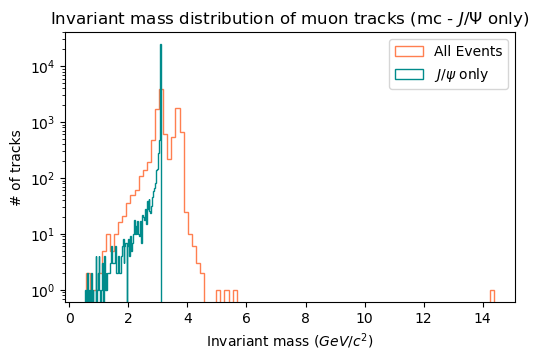

In [21]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector

def mag(px:float,py:float,pz:float):
    """Returns the norm of the 3-vector (px,py,pz)."""
    return math.sqrt(px*px+py*py+pz*pz)

def invMass(p:float, E:float):
    """Returns the invariant mass of the event"""
    return math.sqrt(E*E - p*p)

def transverseMomentum(px:float, py:float):
    """Returns the transverse Momentum of the 3-vector (px, py, pz) along the z-axis."""
    return math.sqrt(px*px + py*py)

!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/nbPmKbcsJvZrjjx/291694/AnalysisResults.root' > run291694.mc.root

!file *.root
file = uproot.open("run291694.mc.root")

events = file["eventsTree"]
gen = file["genTree"]

c = 299792458.

m = events.arrays(["nMuons","Muon_Px","Muon_Py","Muon_Pz", "Muon_E", "Muon_Charge"],how="zip",entry_stop=1000000)
g = gen.arrays(["nMuonsGen", "Muon_GenE", "Muon_GenPx", "Muon_GenPy", "Muon_GenPz", "Muon_GenMotherPDGCode"], how="zip", entry_stop=1000000)
charge = np.array([0,0])
totalMomentum = np.array([0., 0., 0])
totalMomentum_norm = 0.
energy = np.array([0.,0.])
totalEnergy = 0.

invariantMass = np.array([],dtype=float)

for event in m[m.nMuons==2]:
    tracks = event["Muon"].to_list()
    i = 0
    momentum_x = np.array([], dtype=float)
    momentum_y = np.array([], dtype=float)
    momentum_z = np.array([], dtype=float)
    energy = np.array([], dtype=float)
    for t in tracks:
        energy = np.append(energy, t["E"])
        momentum_x = np.append(momentum_x, t["Px"])
        momentum_y = np.append(momentum_y, t["Py"])
        momentum_z = np.append(momentum_z, t["Pz"])
        if (t["Charge"] == 1):
            charge[i] = 1
        elif (t["Charge"] == -1):
            charge[i] = -1
        i += 1
    if charge[0] != charge[1]:
        totalMomentum[0] = np.sum(momentum_x)
        totalMomentum[1] = np.sum(momentum_y)
        totalMomentum[2] = np.sum(momentum_z)
        totalMomentum_norm = mag(totalMomentum[0], totalMomentum[1], totalMomentum[2])
        totalEnergy = np.sum(energy)
        invariantMass = np.append(invariantMass, invMass(totalMomentum_norm, totalEnergy))

invariantMass_jpsi = np.array([], dtype=float)
totalMomentum_jpsi = np.array([0., 0., 0])
totalMomentum_norm_jpsi = 0.

for event in g[g.nMuonsGen==2]:
    tracks = event["Muon"].to_list()
    momentum_x = np.array([], dtype=float)
    momentum_y = np.array([], dtype=float)
    momentum_z = np.array([], dtype=float)
    energy = np.array([], dtype=float)
    for t in tracks:
        energy = np.append(energy, t["GenE"])
        momentum_x = np.append(momentum_x, t["GenPx"])
        momentum_y = np.append(momentum_y, t["GenPy"])
        momentum_z = np.append(momentum_z, t["GenPz"])
    if (t["GenMotherPDGCode"] == 443):
        totalMomentum_jpsi[0] = np.sum(momentum_x)
        totalMomentum_jpsi[1] = np.sum(momentum_y)
        totalMomentum_jpsi[2] = np.sum(momentum_z)
        totalMomentum_norm_jpsi = mag(totalMomentum_jpsi[0], totalMomentum_jpsi[1], totalMomentum_jpsi[2])
        totalEnergy = np.sum(energy)
        invariantMass_jpsi = np.append(invariantMass_jpsi, invMass(totalMomentum_norm_jpsi, totalEnergy))
            
fig = plt.figure(figsize=(5,3))
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.set_title("Invariant mass distribution of muon tracks (mc - $J/\Psi$ only)")
axes.set_xlabel("Invariant mass ($GeV/c^2$)")
axes.set_ylabel("# of tracks")
axes.set_yscale("log")
axes.hist(invariantMass,bins=100,label="All Events",color='coral',histtype='step');
axes.hist(invariantMass_jpsi,bins=100,label="$J/\psi$ only",color='darkcyan',histtype='step');
axes.legend();

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6915k  100 6915k    0     0  1484k      0  0:00:04  0:00:04 --:--:-- 1588k
run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.data.root: ROOT file Version 61600 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)


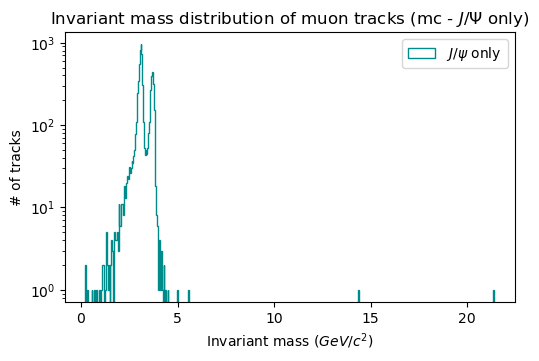

In [9]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector

def mag(px:float,py:float,pz:float):
    """Returns the norm of the 3-vector (px,py,pz)."""
    return math.sqrt(px*px+py*py+pz*pz)

def invMass(p:float, E:float):
    """Returns the invariant mass of the event"""
    return math.sqrt(E*E - p*p)

def transverseMomentum(px:float, py:float):
    """Returns the transverse Momentum of the 3-vector (px, py, pz) along the z-axis."""
    return math.sqrt(px*px + py*py)

!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/nbPmKbcsJvZrjjx/291694/AnalysisResults.root' > run291694.mc.root

!file *.root
file = uproot.open("run291694.mc.root")

events = file["eventsTree"]
gen = file["genTree"]

c = 299792458.

m = events.arrays(["nMuons","Muon_Px","Muon_Py","Muon_Pz", "Muon_E", "Muon_Charge"],how="zip",entry_stop=1000000)
g = gen.arrays(["nMuonsGen", "Muon_GenE", "Muon_GenPx", "Muon_GenPy", "Muon_GenPz", "Muon_GenMotherPDGCode"], how="zip", entry_stop=1000000)
charge = np.array([0,0])
totalMomentum = np.array([0., 0., 0])
totalMomentum_norm = 0.
energy = np.array([0.,0.])
totalEnergy = 0.

invariantMass = np.array([],dtype=float)
invariantMass_jpsi = np.array([], dtype=float)
totalMomentum_jpsi = np.array([0., 0., 0])
totalMomentum_norm_jpsi = 0.

listRebuilt = m[m.nMuons==2]
listGenerated = g[g.nMuonsGen==2]

for event, eventGen in zip(listRebuilt, listGenerated):
    tracks = event["Muon"].to_list()
    tracksGen = eventGen["Muon"].to_list()
    momentum_x = np.array([], dtype=float)
    momentum_y = np.array([], dtype=float)
    momentum_z = np.array([], dtype=float)
    energy = np.array([], dtype=float)
    for t, u in zip(tracks, tracksGen):
        energy = np.append(energy, t["E"])
        momentum_x = np.append(momentum_x, t["Px"])
        momentum_y = np.append(momentum_y, t["Py"])
        momentum_z = np.append(momentum_z, t["Pz"])
    if (u["GenMotherPDGCode"] == 443):
        totalMomentum_jpsi[0] = np.sum(momentum_x)
        totalMomentum_jpsi[1] = np.sum(momentum_y)
        totalMomentum_jpsi[2] = np.sum(momentum_z)
        totalMomentum_norm_jpsi = mag(totalMomentum_jpsi[0], totalMomentum_jpsi[1], totalMomentum_jpsi[2])
        totalEnergy = np.sum(energy)
        invariantMass_jpsi = np.append(invariantMass_jpsi, invMass(totalMomentum_norm_jpsi, totalEnergy))
            
fig = plt.figure(figsize=(5,3))
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.set_title("Invariant mass distribution of muon tracks (mc - $J/\Psi$ only)")
axes.set_xlabel("Invariant mass ($GeV/c^2$)")
axes.set_ylabel("# of tracks")
axes.set_yscale("log")
axes.hist(invariantMass_jpsi,bins=500,label="$J/\psi$ only",color='darkcyan',histtype='step');
axes.legend();